**Problem Statement:**

This dataset contains information about used cars.
The problem statement is to make a model for vehicle price prediction using this dataset.


In [1]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the  data
file1=pd.read_excel("/content/D2_file1.xlsx")
file2=pd.read_excel("/content/D2_file2.xlsx")
file3=pd.read_excel("/content/D2_file3.xlsx")
target=pd.read_excel("/content/D2_target.xlsx")

In [3]:
file1.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
file2.head()

,id,Make,Model,Year
0,1,Honda,Amaze 1.2 VX i-VTEC,2017
1,2,Maruti Suzuki,Swift DZire VDI,2014
2,3,Hyundai,i10 Magna 1.2 Kappa2,2011
3,4,Toyota,Glanza G,2019
4,5,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018


In [5]:
file3.head()

,id,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,1,87150,Petrol,Manual,Pune,Grey,First,Corporate
1,2,75000,Diesel,Manual,Ludhiana,White,Second,Individual
2,3,67000,Petrol,Manual,Lucknow,Maroon,First,Individual
3,4,37500,Petrol,Manual,Mangalore,Red,First,Individual
4,5,69000,Diesel,Manual,Mumbai,Grey,First,Individual


In [6]:
target.head()

,id,Price
0,1,505000
1,2,450000
2,3,220000
3,4,799000
4,5,1950000


EXPLORATORY DATA ANALYSIS

In [7]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              1979 non-null   object 
 2   Max Power           1979 non-null   object 
 3   Max Torque          1979 non-null   object 
 4   Drivetrain          1923 non-null   object 
 5   Length              1995 non-null   float64
 6   Width               1995 non-null   float64
 7   Height              1995 non-null   float64
 8   Seating Capacity    1995 non-null   float64
 9   Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 161.0+ KB


In [8]:
file1.shape

(2059, 10)

In [9]:
file1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1030.000000,594.526422,1.0,515.50,1030.0,1544.5,2059.0
Length,1995.0,4280.860652,442.458507,3099.0,3985.00,4370.0,4629.0,5569.0
Width,1995.0,1767.991980,135.265825,1475.0,1695.00,1770.0,1831.5,2220.0
Height,1995.0,1591.735338,136.073956,1165.0,1485.00,1545.0,1675.0,1995.0
Seating Capacity,1995.0,5.306266,0.822170,2.0,5.00,5.0,5.0,8.0
Fuel Tank Capacity,1946.0,52.002210,15.110198,15.0,41.25,50.0,60.0,105.0


In [10]:
file1.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
dtype: int64

In [11]:
file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2059 non-null   int64 
 1   Make    2059 non-null   object
 2   Model   2059 non-null   object
 3   Year    2059 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 64.5+ KB


In [12]:
file2.nunique()

id       2059
Make       33
Model    1050
Year       22
dtype: int64

In [13]:
file2.shape

(2059, 4)

In [14]:
file2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1030.000000,594.526422,1.0,515.5,1030.0,1544.5,2059.0
Year,2059.0,2016.425449,3.363564,1988.0,2014.0,2017.0,2019.0,2022.0


In [15]:
file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2059 non-null   int64 
 1   Kilometer     2059 non-null   int64 
 2   Fuel Type     2059 non-null   object
 3   Transmission  2059 non-null   object
 4   Location      2059 non-null   object
 5   Color         2059 non-null   object
 6   Owner         2059 non-null   object
 7   Seller Type   2059 non-null   object
dtypes: int64(2), object(6)
memory usage: 128.8+ KB


In [16]:
file3.nunique()

id              2059
Kilometer        847
Fuel Type          9
Transmission       2
Location          77
Color             17
Owner              6
Seller Type        3
dtype: int64

In [17]:
file3.shape

(2059, 8)

In [18]:
file3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1030.000000,594.526422,1.0,515.5,1030.0,1544.5,2059.0
Kilometer,2059.0,54224.714424,57361.721314,0.0,29000.0,50000.0,72000.0,2000000.0


In [19]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2059 non-null   int64
 1   Price   2059 non-null   int64
dtypes: int64(2)
memory usage: 32.3 KB


In [20]:
target.nunique()

id       2059
Price     619
dtype: int64

In [21]:
target.shape

(2059, 2)

In [22]:
target.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1.030000e+03,5.945264e+02,1.0,515.5,1030.0,1544.5,2059.0
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.0,825000.0,1925000.0,35000000.0


In [23]:
# fill missing values using forward filling
file1.ffill(inplace=True)
file1.isnull().sum().sum()

0

In [24]:
file2.isnull().sum()

id       0
Make     0
Model    0
Year     0
dtype: int64

In [25]:
file3.isnull().sum()

id              0
Kilometer       0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
dtype: int64

In [26]:
target.isnull().sum()

id       0
Price    0
dtype: int64

In [27]:
# Checking and removing any duplicates from the data
file1[file1.duplicated()]
file1.drop_duplicates(inplace=True)
file1

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...
2054,2055,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,2056,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,2057,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,2058,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [28]:
file2[file2.duplicated()]
file2.drop_duplicates(inplace=True)
file2

,id,Make,Model,Year
0,1,Honda,Amaze 1.2 VX i-VTEC,2017
1,2,Maruti Suzuki,Swift DZire VDI,2014
2,3,Hyundai,i10 Magna 1.2 Kappa2,2011
3,4,Toyota,Glanza G,2019
4,5,Toyota,Innova 2.4 VX 7 STR [2016-2020],2018
...,...,...,...,...
2054,2055,Mahindra,XUV500 W8 [2015-2017],2016
2055,2056,Hyundai,Eon D-Lite +,2014
2056,2057,Ford,Figo Duratec Petrol ZXI 1.2,2013
2057,2058,BMW,5-Series 520d Luxury Line [2017-2019],2018


In [29]:
file3[file3.duplicated()]
file3.drop_duplicates(inplace=True)
file3

,id,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,1,87150,Petrol,Manual,Pune,Grey,First,Corporate
1,2,75000,Diesel,Manual,Ludhiana,White,Second,Individual
2,3,67000,Petrol,Manual,Lucknow,Maroon,First,Individual
3,4,37500,Petrol,Manual,Mangalore,Red,First,Individual
4,5,69000,Diesel,Manual,Mumbai,Grey,First,Individual
...,...,...,...,...,...,...,...,...
2054,2055,90300,Diesel,Manual,Surat,White,First,Individual
2055,2056,83000,Petrol,Manual,Ahmedabad,White,Second,Individual
2056,2057,73000,Petrol,Manual,Thane,Silver,First,Individual
2057,2058,60474,Diesel,Automatic,Coimbatore,White,First,Individual


In [30]:
target[target.duplicated()]
target.drop_duplicates(inplace=True)
target

,id,Price
0,1,505000
1,2,450000
2,3,220000
3,4,799000
4,5,1950000
...,...,...
2054,2055,850000
2055,2056,275000
2056,2057,240000
2057,2058,4290000


In [31]:
data_merge= pd.merge(file1,file2,on=['id'])

In [32]:
data_merge.shape

(2059, 13)

In [33]:
data_merge1 = pd.merge(data_merge,file3,on=['id'])

In [34]:
data_merge1.shape

(2059, 20)

In [35]:
data =  pd.merge(data_merge1,target,on=['id'])

In [36]:
data.shape

(2059, 21)

In [37]:
data.head()

,id,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,...,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Price
0,1,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,...,Amaze 1.2 VX i-VTEC,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,505000
1,2,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,...,Swift DZire VDI,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,450000
2,3,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,...,i10 Magna 1.2 Kappa2,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,220000
3,4,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,...,Glanza G,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,799000
4,5,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,...,Innova 2.4 VX 7 STR [2016-2020],2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,1950000


In [38]:
data.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
Make                    33
Model                 1050
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Price                  619
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2059 non-null   int64  
 1   Engine              2059 non-null   object 
 2   Max Power           2059 non-null   object 
 3   Max Torque          2059 non-null   object 
 4   Drivetrain          2059 non-null   object 
 5   Length              2059 non-null   float64
 6   Width               2059 non-null   float64
 7   Height              2059 non-null   float64
 8   Seating Capacity    2059 non-null   float64
 9   Fuel Tank Capacity  2059 non-null   float64
 10  Make                2059 non-null   object 
 11  Model               2059 non-null   object 
 12  Year                2059 non-null   int64  
 13  Kilometer           2059 non-null   int64  
 14  Fuel Type           2059 non-null   object 
 15  Transmission        2059 non-null   object 
 16  Locati

In [40]:
data.isnull().sum()

id                    0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
Make                  0
Model                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Price                 0
dtype: int64

In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2059.0,1.030000e+03,5.945264e+02,1.0,515.5,1030.0,1544.5,2059.0
Length,2059.0,4.276709e+03,4.438944e+02,3099.0,3985.0,4360.0,4624.0,5569.0
Width,2059.0,1.767073e+03,1.358033e+02,1475.0,1695.0,1770.0,1831.0,2220.0
Height,2059.0,1.591423e+03,1.361862e+02,1165.0,1485.0,1545.0,1675.0,1995.0
Seating Capacity,2059.0,5.301117e+00,8.174801e-01,2.0,5.0,5.0,5.0,8.0
Fuel Tank Capacity,2059.0,5.192535e+01,1.509322e+01,15.0,41.0,50.0,60.0,105.0
Year,2059.0,2.016425e+03,3.363564e+00,1988.0,2014.0,2017.0,2019.0,2022.0
Kilometer,2059.0,5.422471e+04,5.736172e+04,0.0,29000.0,50000.0,72000.0,2000000.0
Price,2059.0,1.702992e+06,2.419881e+06,49000.0,484999.0,825000.0,1925000.0,35000000.0


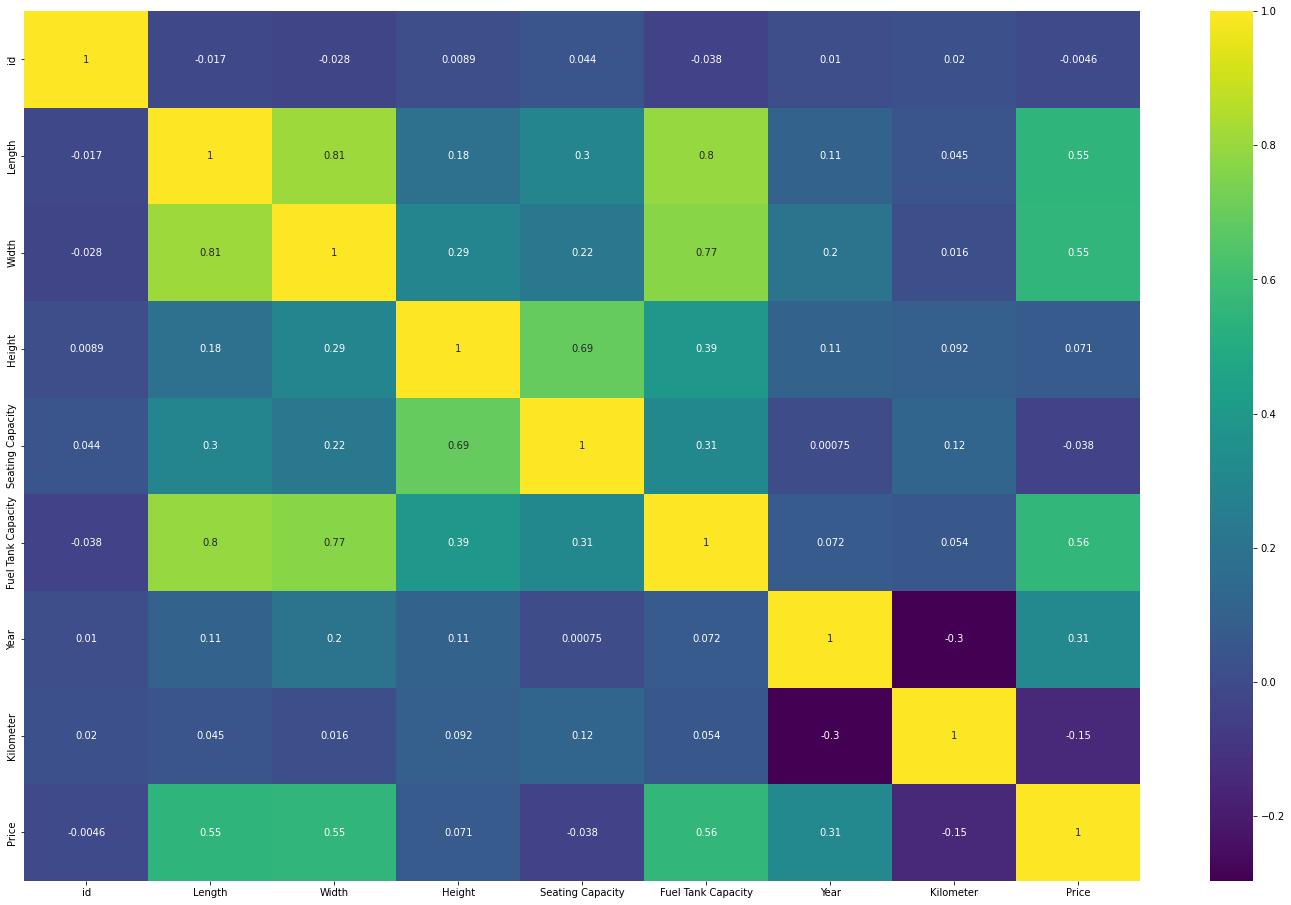

In [42]:
plt.figure(figsize=(25,16))
ax = sns.heatmap(data.corr(),annot = True, cmap = 'viridis')
plt.show()
     

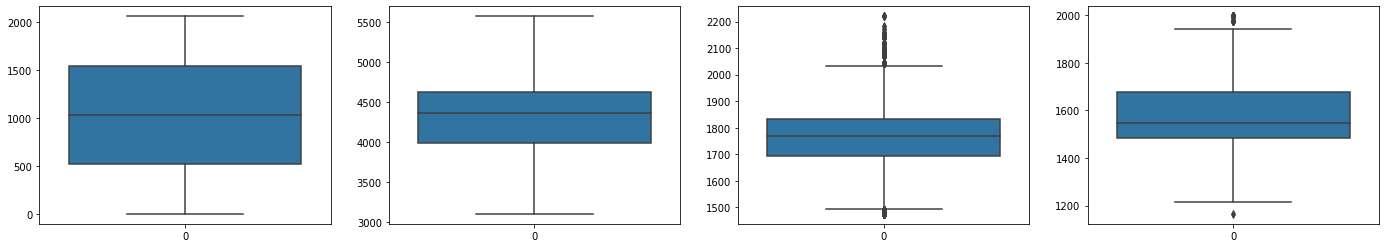

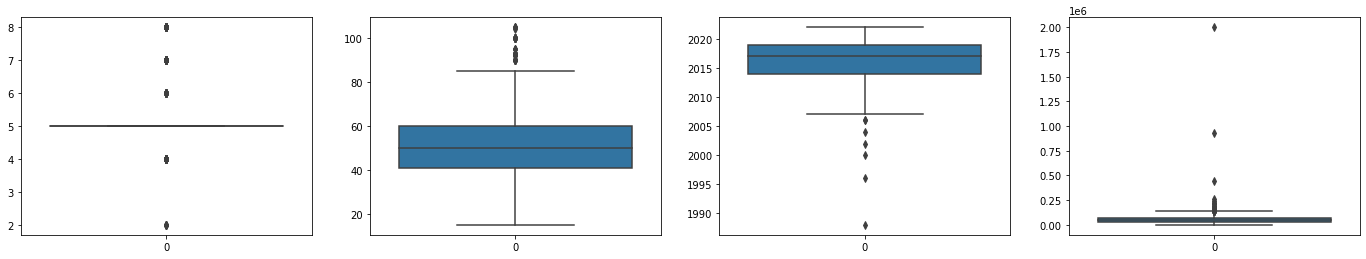

In [43]:
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['id'])
plt.subplot(1,4,2)
sns.boxplot(data['Length'])
plt.subplot(1,4,3)
sns.boxplot(data['Width'])
plt.subplot(1,4,4)
sns.boxplot(data['Height'])
plt.show()
plt.figure(figsize = (24,4))
plt.subplot(1,4,1)
sns.boxplot(data['Seating Capacity'])
plt.subplot(1,4,2)
sns.boxplot(data['Fuel Tank Capacity'])
plt.subplot(1,4,3)
sns.boxplot(data['Year'])
plt.subplot(1,4,4)
sns.boxplot(data['Kilometer'])
plt.show()

<Axes: >

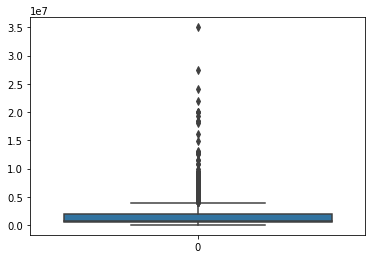

In [44]:
sns.boxplot(data['Price'])

In [45]:
data.nunique()

id                    2059
Engine                 108
Max Power              335
Max Torque             290
Drivetrain               3
Length                 248
Width                  170
Height                 196
Seating Capacity         6
Fuel Tank Capacity      55
Make                    33
Model                 1050
Year                    22
Kilometer              847
Fuel Type                9
Transmission             2
Location                77
Color                   17
Owner                    6
Seller Type              3
Price                  619
dtype: int64


Continous - Engine,Max Power,Max Torque Numeric

Discrete- Drivetrain,Make,Model,Fuel Type,Transmission,Color,Owner,Seller Type,Location

In [46]:
data["Engine"].value_counts()

1197 cc    246
1248 cc    128
998 cc     127
1995 cc     85
1497 cc     84
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: Engine, Length: 108, dtype: int64

In [47]:
# extract numerical values from 'Engine' column
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(int)

In [48]:
data["Max Power"].value_counts()

89 bhp @ 4000 rpm     93
82 bhp @ 6000 rpm     65
83 bhp @ 6000 rpm     59
126 bhp @ 4000 rpm    57
74 bhp @ 4000 rpm     54
                      ..
164 bhp @ 3800 rpm     1
157 bhp @ 6500 rpm     1
255 bhp @ 3600 rpm     1
76 bhp @ 6000 rpm      1
329 bhp @ 5250 rpm     1
Name: Max Power, Length: 335, dtype: int64

In [49]:
# extract the numeric value from 'Max Power' column
data['Max Power Numeric'] = data['Max Power'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

In [50]:
data["Max Torque"].value_counts()

200 Nm @ 1750 rpm    92
115 Nm @ 4000 rpm    83
114 Nm @ 4000 rpm    69
90 Nm @ 3500 rpm     67
400 Nm @ 1750 rpm    64
                     ..
350@1750              1
400 Nm @ 2000 rpm     1
400 Nm @ 1500 rpm     1
205 Nm @ 1800 rpm     1
480 Nm @ 1600 rpm     1
Name: Max Torque, Length: 290, dtype: int64

In [51]:
# extract the numeric value from 'Max Torque' column
data['Max Torque Numeric'] = data['Max Torque'].str.extract('(\d+\.?\d*)', expand=False).astype(float)

In [52]:
data_num=data._get_numeric_data()
data_num.head()

,id,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,1,1198,3990.0,1680.0,1505.0,5.0,35.0,2017,87150,505000,87.0,109.0000
1,2,1248,3995.0,1695.0,1555.0,5.0,42.0,2014,75000,450000,74.0,190.0000
2,3,1197,3585.0,1595.0,1550.0,5.0,35.0,2011,67000,220000,79.0,112.7619
3,4,1197,3995.0,1745.0,1510.0,5.0,37.0,2019,37500,799000,82.0,113.0000
4,5,2393,4735.0,1830.0,1795.0,7.0,55.0,2018,69000,1950000,148.0,343.0000


In [53]:
# normalizing the numerical columns
data_num = (data_num - data_num.min()) / (data_num.max() - data_num.min())
data_num

,id,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,0.000000,0.096180,0.360729,0.275168,0.409639,0.500000,0.222222,0.852941,0.043575,0.013047,0.0832,0.083333
1,0.000486,0.104558,0.362753,0.295302,0.469880,0.500000,0.300000,0.764706,0.037500,0.011473,0.0624,0.193989
2,0.000972,0.096012,0.196761,0.161074,0.463855,0.500000,0.222222,0.676471,0.033500,0.004893,0.0704,0.088473
3,0.001458,0.096012,0.362753,0.362416,0.415663,0.500000,0.244444,0.911765,0.018750,0.021459,0.0752,0.088798
4,0.001944,0.296414,0.662348,0.476510,0.759036,0.833333,0.444444,0.882353,0.034500,0.054390,0.1808,0.403005
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.998056,0.260556,0.601619,0.557047,0.746988,0.833333,0.611111,0.823529,0.045150,0.022918,0.1648,0.385246
2055,0.998542,0.031836,0.160324,0.100671,0.403614,0.500000,0.188889,0.764706,0.041500,0.006466,0.0320,0.036885
2056,0.999028,0.095845,0.281781,0.275168,0.315663,0.500000,0.333333,0.735294,0.036500,0.005465,0.0560,0.073770
2057,0.999514,0.229725,0.743725,0.527517,0.378313,0.500000,0.555556,0.882353,0.030237,0.121341,0.2448,0.480874


In [54]:
data["Drivetrain"].value_counts()

FWD    1425
RWD     341
AWD     293
Name: Drivetrain, dtype: int64

In [55]:
data["Make"].value_counts()

Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: Make, dtype: int64

In [56]:
data["Fuel Type"].value_counts()

Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: Fuel Type, dtype: int64

In [57]:
data["Transmission"].value_counts()

Manual       1133
Automatic     926
Name: Transmission, dtype: int64

In [58]:
data["Location"].value_counts()

Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: Location, Length: 77, dtype: int64

In [59]:
data["Color"].value_counts()

White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: Color, dtype: int64

In [60]:
data["Owner"].value_counts()

First               1619
Second               373
Third                 42
UnRegistered Car      21
Fourth                 3
4 or More              1
Name: Owner, dtype: int64

In [61]:
data["Seller Type"].value_counts()

Individual                 1997
Corporate                    57
Commercial Registration       5
Name: Seller Type, dtype: int64

In [62]:
data_cat =data[['Drivetrain','Make','Model','Fuel Type','Transmission','Location','Color','Owner','Seller Type']]
data_cat.shape

(2059, 9)

In [63]:
data_cat.head()

,Drivetrain,Make,Model,Fuel Type,Transmission,Location,Color,Owner,Seller Type
0,FWD,Honda,Amaze 1.2 VX i-VTEC,Petrol,Manual,Pune,Grey,First,Corporate
1,FWD,Maruti Suzuki,Swift DZire VDI,Diesel,Manual,Ludhiana,White,Second,Individual
2,FWD,Hyundai,i10 Magna 1.2 Kappa2,Petrol,Manual,Lucknow,Maroon,First,Individual
3,FWD,Toyota,Glanza G,Petrol,Manual,Mangalore,Red,First,Individual
4,RWD,Toyota,Innova 2.4 VX 7 STR [2016-2020],Diesel,Manual,Mumbai,Grey,First,Individual


In [64]:
data_cat.isnull().sum()

Drivetrain      0
Make            0
Model           0
Fuel Type       0
Transmission    0
Location        0
Color           0
Owner           0
Seller Type     0
dtype: int64

In [65]:
#dummification for categorical columns
g_d=pd.get_dummies(data_cat)

In [66]:
g_d.head()

,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,...,Color_Yellow,Owner_4 or More,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Commercial Registration,Seller Type_Corporate,Seller Type_Individual
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [67]:
data_num.columns

Index(['id', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Year', 'Kilometer', 'Price', 'Max Power Numeric',
       'Max Torque Numeric'],
      dtype='object')

In [68]:
# concating the numerical column and updated categorical column 
data_final=pd.concat([g_d,data_num],axis=1)
data_final.head()

,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,...,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Year,Kilometer,Price,Max Power Numeric,Max Torque Numeric
0,0,1,0,0,0,0,0,0,0,0,...,0.360729,0.275168,0.409639,0.500000,0.222222,0.852941,0.043575,0.013047,0.0832,0.083333
1,0,1,0,0,0,0,0,0,0,0,...,0.362753,0.295302,0.469880,0.500000,0.300000,0.764706,0.037500,0.011473,0.0624,0.193989
2,0,1,0,0,0,0,0,0,0,0,...,0.196761,0.161074,0.463855,0.500000,0.222222,0.676471,0.033500,0.004893,0.0704,0.088473
3,0,1,0,0,0,0,0,0,0,0,...,0.362753,0.362416,0.415663,0.500000,0.244444,0.911765,0.018750,0.021459,0.0752,0.088798
4,0,0,1,0,0,0,0,0,0,0,...,0.662348,0.476510,0.759036,0.833333,0.444444,0.882353,0.034500,0.054390,0.1808,0.403005


In [69]:
data_final.shape

(2059, 1212)

In [70]:
data_final['Price']

0       0.013047
1       0.011473
2       0.004893
3       0.021459
4       0.054390
          ...   
2054    0.022918
2055    0.006466
2056    0.005465
2057    0.121341
2058    0.017768
Name: Price, Length: 2059, dtype: float64

Train and Test split

In [71]:
# importing neccessary libraries
#from sklearn.model_selection import train_test_split

# splitting of data
#X = data_final.drop(['Price'],axis=1)
#y = data_final['Price']

In [72]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Lasso_Regression model building without using sklearn

In [73]:
import numpy as np
import pandas as pd

class LassoRegression:

    # initiating the hyperparameters
    def __init__(self, lambda_parameter, no_of_iterations, learning_rate):
        self.lambda_parameter = lambda_parameter
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
    
    # fitting the dataset to the Lasso Regression model
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = np.mean(y)

        # implementing Gradient Descent algorithm for Optimization
        for i in range(self.no_of_iterations):
            coef_w = np.copy(self.w)
            for j in range(X.shape[1]): #This line begins a nested for loop that will iterate over each feature in the feature matrix X. 
                X_j = X[:,j]
                X_not_j = np.delete(X, j, axis=1)

                # linear equation of the model
                y_pred = self.b + X_not_j.dot(self.w[np.arange(X.shape[1]) != j])

                residual_j = X_j.dot(y - y_pred)

                if residual_j < -self.lambda_parameter/2:
                    self.w[j] = (residual_j + self.lambda_parameter/2) / np.sum(X_j**2)
                elif residual_j > self.lambda_parameter/2:
                    self.w[j] = (residual_j - self.lambda_parameter/2) / np.sum(X_j**2)
                else:
                    self.w[j] = 0
                    
            if np.linalg.norm(self.w - coef_w) < self.learning_rate:
                break

    # Predicting the Target variable
    def predict(self, X):
        return self.b + X.dot(self.w)

    # R-squared coefficient to evaluate the model
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y - y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        return 1 - (SS_res / SS_tot)

    # Cross Validation score for K-fold cross validation
    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]      #This line gets the number of rows (samples) in the feature array X
        idx = np.arange(n)  # This line creates an array of integers from 0 to n-1.
        np.random.shuffle(idx)
        X_folds = np.array_split(X[idx], k)  
        y_folds = np.array_split(y[idx], k)
        scores = []  #this line initializes an empty list scores to store the R-squared scores.
        for i in range(k):
            X_train = np.vstack(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            #This line concatenates all the y sub-arrays except the i-th sub-array to create the training target array y_train.
            X_valid = X_folds[i]
            y_valid = y_folds[i] #This line selects the i-th sub-array of y as the validation target array y_valid.
            self.fit(X_train, y_train)
            score = self.r_squared(X_valid, y_valid)
            scores.append(score)
            #This line adds the R-squared score to the scores list.
        return scores

# Grid search to tune the hyperparameters
    def grid_search(self, X, y, param_grid, k=5):
        best_score = -np.inf
        best_params = None
        for params in param_grid:
            self.lambda_parameter = params['lambda']
            self.no_of_iterations = params['iterations']
            self.learning_rate = params['learning_rate']
            scores = self.cross_val_score(X, y, k=k)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.lambda_parameter = best_params['lambda']
        self.no_of_iterations = best_params['iterations']
        self.learning_rate = best_params['learning_rate']

    # Get coefficients of the model
    def get_coefficients(self):
        return self.w, self.b


In [74]:
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.001)

# Split the data into features and target variable
X = data_final.drop('Price', axis=1)
y = data_final['Price']
  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [75]:
# Define the hyperparameters to search over
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
for params in param_grid:
    lambda_parameter = params[0]
    no_of_iterations = params[1]
    learning_rate = params[2]
             
# Create a Lasso Regression object
model = LassoRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.01)

# Print the best hyperparameters and the corresponding cross-validation score
print('Best hyperparameters:', model.lambda_parameter, model.no_of_iterations, model.learning_rate)
#print('Cross-validation score:', np.mean(model.cross_val_score(X_train.values, y_train.values, k=5)))


Best hyperparameters: 0.1 1000 0.01


In [ ]:

#cv_scores = LassoRegression.cross_val_score(X, y, k=5)
cv_scores = model.cross_val_score(X_train.values, y_train.values, k=5)


print("Cross Validation scores:", cv_scores)
print("Average CV score:", np.mean(cv_scores))

# Fit the model on the entire dataset
#LassoRegression.fit(X, y)
model.fit(X_train.values, y_train.values)


# Make predictions on new data

X_new = pd.DataFrame([[0]*32])
X_new.iloc[0, :7] = [0.01, 0.001, 0.0001, 0.1, 1, 10, 100]
y_new = model.predict(X_new)
print("Prediction:", y_new)



Cross Validation scores: [0.7363740591208539, 0.7131062570399498, 0.7032945804398949, 0.6889481844533886, 0.7171930231570081]
Average CV score: 0.711783220842219
Prediction: 0    7.468522
dtype: float64


In [ ]:
# Make predictions on the train set
y_train_pred = model.predict(X_train.values)

# Calculate mean squared error
mse_train = ((y_train.values - y_train_pred) ** 2).mean()

# Calculate root mean squared error
rmse_train = np.sqrt(mse_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate R-squared
ssr_train = ((y_train_pred - y_train.values) ** 2).sum()
sst_train = ((y_train.values - y_train.values.mean()) ** 2).sum()
r_squared_train = 1 - (ssr_train / sst_train)

# Print the error metrics
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R-squared:", r_squared_train)



Mean Absolute Error: 0.011801536764338144
Mean Squared Error: 0.0009011819195579959
Root Mean Squared Error: 0.030019692196256706
R-squared: 0.792063362144486


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test.values)

# Calculate mean squared error
mse_test = ((y_test.values - y_pred) ** 2).mean()

# Calculate root mean squared error
rmse_test = np.sqrt(mse_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_pred).mean()

# Calculate R-squared
ssr_test = ((y_pred - y_test.values) ** 2).sum()
sst_test = ((y_test.values - y_test.values.mean()) ** 2).sum()
r_squared_test = 1 - (ssr_test / sst_test)

# Print the error metrics

print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("Root Mean Squared Error:", rmse_test)
print("R-squared:", r_squared_test)


Mean Absolute Error: 0.015374645252313026
Mean Squared Error: 0.001968510697989315
Root Mean Squared Error: 0.04436790166313159
R-squared: 0.6636984704653446
